In [274]:
# Project - Does the weather get hotter as we approach the equator?  And other interesting correlations 


from citipy import citipy
from config import weather_key
from random import uniform
import requests
import json

In [275]:
# Create a list of 500 Random Cities

from config import key

full_list = []
number = 0 
while number < 600:
    country = []
    
    # Create a random latitude and longitude
    lat_x,lon_x = uniform(-90,90), uniform(-180,180)
    city = citipy.nearest_city(lat_x,lon_x)
    country.append(city.city_name)
    country.append(city.country_code)
    try:
        
        # Make a Call to the Google GeoCode to retrieve the real Latitude/Longitude for the given city
        url = f'https://maps.googleapis.com/maps/api/geocode/json?&components=country:{city.country_code}|locality:{city.city_name}&key=%s' % (key)
        response = requests.get(url).json()
        lat = response['results'][0]['geometry']['location']['lat']
        long = response['results'][0]['geometry']['location']['lng']
        country.append(lat)
        country.append(long)
    except:
        country.append(lat_x)
        country.append(lon_x)
        
    full_list.append(country)
    number += 1

# Create a DataFrame from the result
city_data = pd.DataFrame(full_list,columns=('City','Country','Latitude','Longitude'))   
    

In [276]:
# Plot City Data to see if it provides a thorough representation of the world

import gmaps


gmaps.configure(api_key = key)
fig = gmaps.figure()
marker = gmaps.marker_layer(city_data[['Latitude','Longitude']])
fig.add_layer(marker)
fig

Figure(layout=FigureLayout(height='420px'))

In [277]:
# Extracting Temperature, Humidity, Cloudiness, and Wind Speed for each city Using the OpenWeatherMap API
# and adding it to the DataFrame

for index, row in city_data.iterrows():
    city = row[0]
    country = row[1]
    lat = row[2]
    long = row[3]
    
    try:
        # Isolating the Temp, Humidity, Cloudiness, Wind Speed for each city
        url = f'https://api.openweathermap.org/data/2.5/weather?q={city},{country}&units=imperial&appid=%s' % (weather_key)
        response = requests.get(url).json()
        city_data.loc[index,'Temperature'] = response['main']['temp']
        city_data.loc[index,'Humidity'] = response['main']['humidity']
        city_data.loc[index,'Cloudiness %'] = response['clouds']['all']
        city_data.loc[index,'Wind Speed (MPH)'] = response['wind']['speed']
    except:
        
        # If the city can't be found then this statement is printed
        print(f"This location ({city},{country},{lat},{long}) wasn't found.")
        

This location (binabalian,ph,16.4067014,119.9335779) wasn't found.
This location (mataura,pf,-23.3470634,-149.4850445) wasn't found.
This location (saint anthony,ca,51.3704156,-55.59586479999999) wasn't found.
This location (tuggurt,dz,33.0996078,6.0785104) wasn't found.
This location (mys shmidta,ru,68.884224,-179.4311219) wasn't found.
This location (olafsvik,is,64.89604849999999,-23.7060262) wasn't found.
This location (bajo baudo,co,4.97168,-77.365608) wasn't found.
This location (taolanaro,mg,-25.0225309,46.9853688) wasn't found.
This location (taolanaro,mg,-25.0225309,46.9853688) wasn't found.
This location (saint combs,gb,57.657156,-1.910084) wasn't found.
This location (amderma,ru,69.751221,61.6636961) wasn't found.
This location (karamea,nz,-41.247636,172.1114872) wasn't found.
This location (vaitupu,wf,-13.2308863,-176.1917035) wasn't found.
This location (barentsburg,sj,78.0648475,14.2334597) wasn't found.
This location (bengkulu,id,-3.792845099999999,102.2607641) wasn't fou

In [278]:
# Removing the rows for which no data was found

all_data = city_data.dropna(axis = 0,how = 'any')
print(f'The number of cities is now {len(all_data)}.')

The number of cities is now 523.


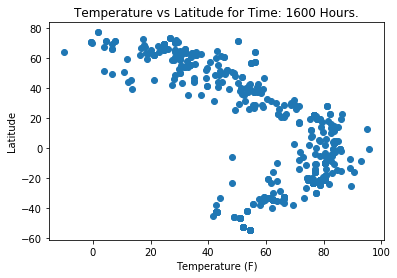

In [289]:
# Scatter Plot to showcase the relationship between Temperature (F) and Latitude

import matplotlib.pyplot as plt
import datetime
current_DT = datetime.datetime.now()

plt.scatter(all_data['Temperature'],all_data['Latitude'])
plt.title(f'Temperature vs Latitude for Time: {current_DT.hour}00 Hours.')
plt.xlabel('Temperature (F)')
plt.ylabel('Latitude')
plt.show()

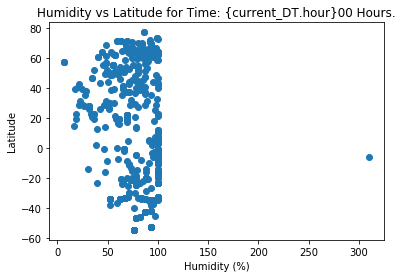

In [290]:
# Scatter plot to showcase the relationship between Humidity (%) and Latitude

plt.scatter(all_data['Humidity'],all_data['Latitude'])
plt.title('Humidity vs Latitude for Time: {current_DT.hour}00 Hours.')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

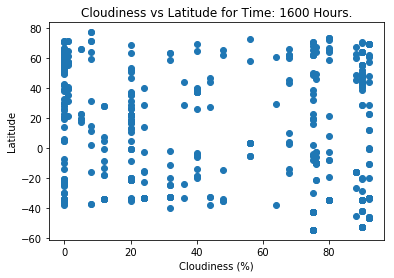

In [292]:
# Scatter plot to showcase the relationship between Cloudiness (%) and Latitude

plt.scatter(all_data['Cloudiness %'],all_data['Latitude'])
plt.title(f'Cloudiness vs Latitude for Time: {current_DT.hour}00 Hours.')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

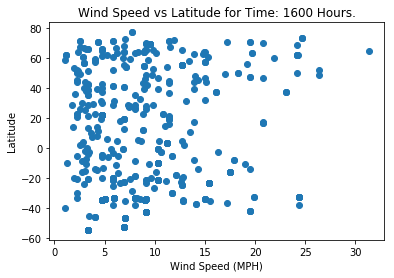

In [293]:
# Scatter plot to showcase the relationship between Wind Speed and Latitude

plt.scatter(all_data['Wind Speed (MPH)'],all_data['Latitude'])
plt.title(f'Wind Speed vs Latitude for Time: {current_DT.hour}00 Hours.')
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')
plt.show()